In [1]:
#importing libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#importing dataset
dataset = pd.read_csv('startup_funding.csv')
dataset.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [3]:
del dataset['Remarks']
dataset.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [4]:
#count the amount of null values in the funding amount column
dataset['AmountInUSD'].isnull().sum()

847

In [5]:
#converting amount from string to Number
li = []
for i in dataset['AmountInUSD']:
    i = str(i)
    i = i.replace(',','')
    if i == np.nan:
        li.append(np.nan)
    else:
        li.append(float(i))
dataset['AmountInUSD'] = li
dataset.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


In [6]:
print(int(dataset['AmountInUSD'].mean()))
print(int(dataset['AmountInUSD'].std()))

12031073
64031175


In [7]:
#clearing NaN values
dataset['AmountInUSD'].isnull()
dataset['AmountInUSD'] = np.where(dataset['AmountInUSD'].isnull(), dataset['AmountInUSD'].mean(), dataset['AmountInUSD'])
li = []
for i in dataset['AmountInUSD']:
    i = float(i)
    li.append(int(i))
dataset['AmountInUSD'] = li
dataset['AmountInUSD'].head(20)

0      1300000
1     12031073
2     12031073
3       500000
4       850000
5      1000000
6      2600000
7     20000000
8      8500000
9     12000000
10     1000000
11    12031073
12    12031073
13     1000000
14    12031073
15     3000000
16     2250000
17      464000
18    12031073
19    18500000
Name: AmountInUSD, dtype: int64

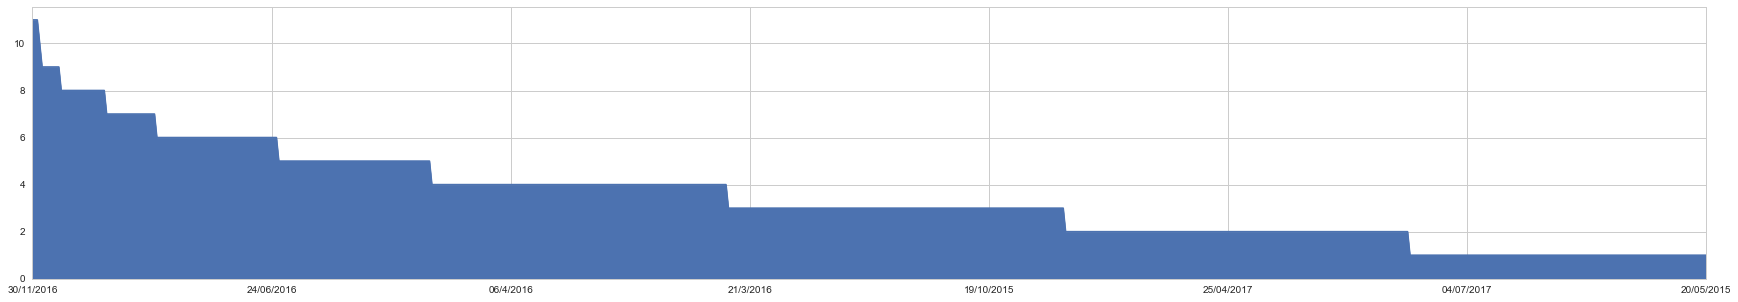

In [8]:
#Number of startups funded by dates
dataset['Date'].value_counts().plot.area(figsize=(30,5))

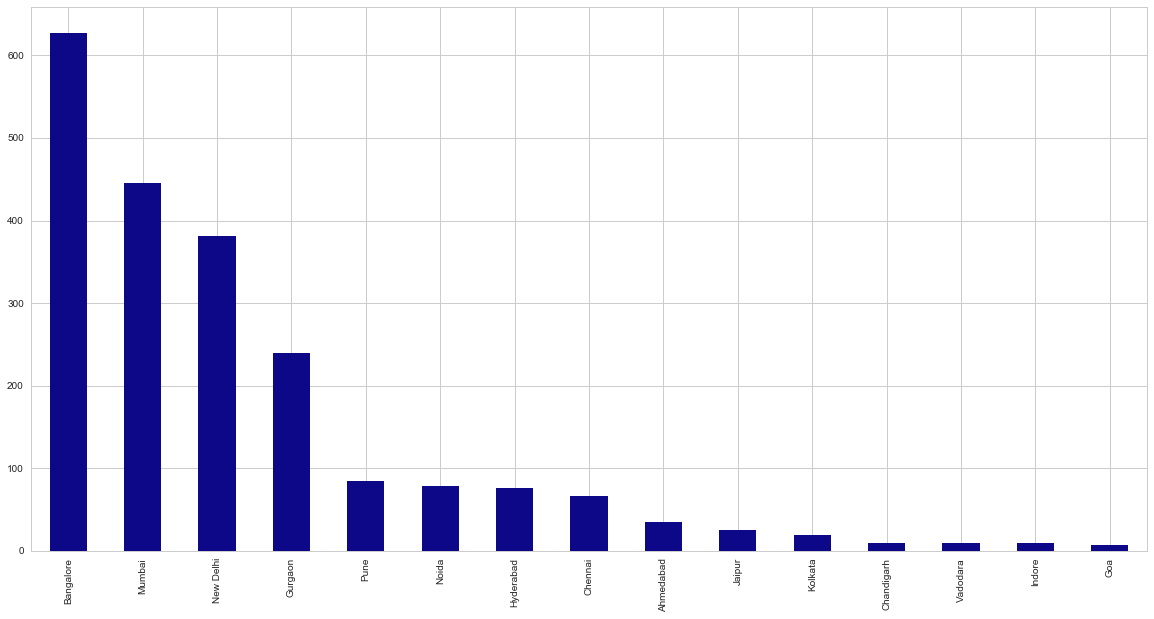

In [9]:
#Number of startups funded by City location(top 15 cities)
dataset['CityLocation'].value_counts().head(15).plot.bar(figsize=(20,10), colormap='plasma')

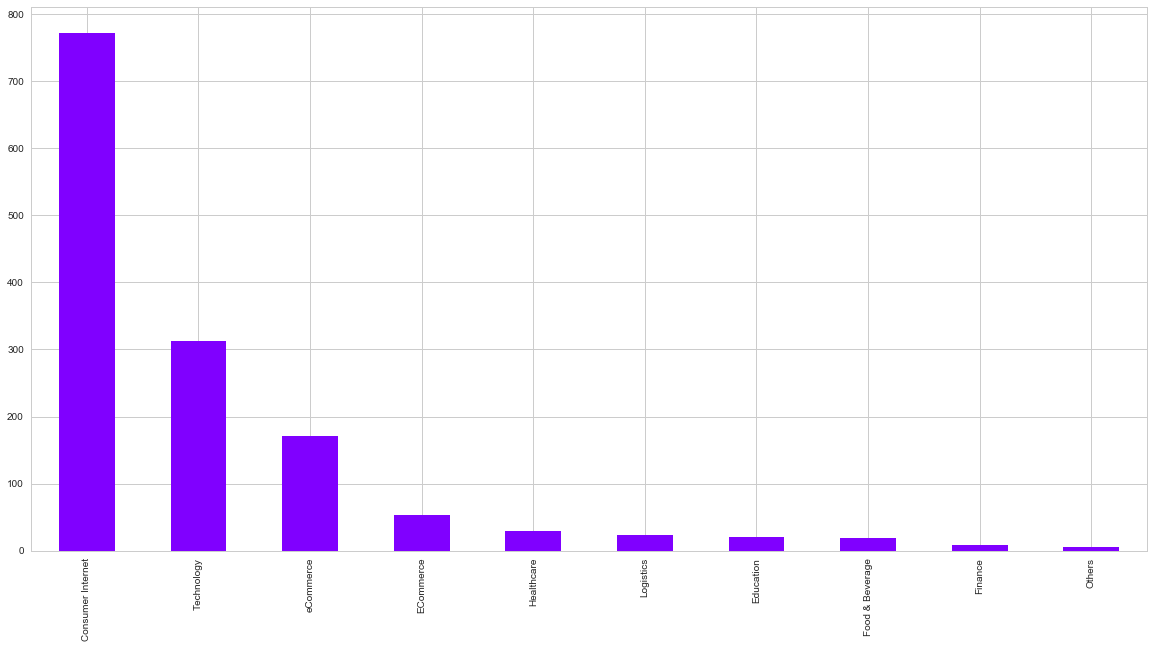

In [10]:
#Number of startups funded by Industry(top 10 industries)
dataset['IndustryVertical'].value_counts().head(10).plot.bar(figsize=(20,10), colormap='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


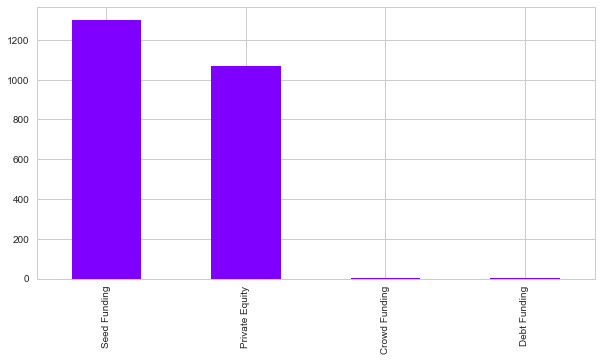

In [11]:
#Number of startups funded by Investment Type
dataset['InvestmentType'][dataset['InvestmentType']=='SeedFunding'] = 'Seed Funding'
dataset['InvestmentType'][dataset['InvestmentType']=='PrivateEquity'] = 'Private Equity'
dataset['InvestmentType'][dataset['InvestmentType']=='Crowd funding'] = 'Crowd Funding'
dataset['InvestmentType'].value_counts().plot.bar(figsize=(10,5), colormap='rainbow')

In [12]:
len(dataset['SubVertical'].unique())

1365

In [13]:
#No of startups with high amount of funding(above standard deviation)
dataset['StartupName'][dataset['AmountInUSD'] > int(dataset['AmountInUSD'].std())].count()

61

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


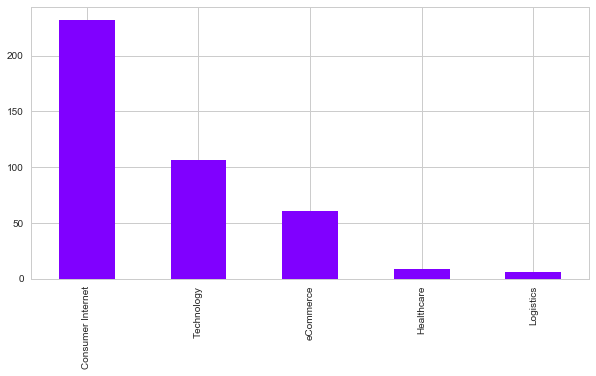

In [14]:
#plotting startups by Industry in Bangalore(City with most number of funded startups)
dataset['IndustryVertical'][dataset['IndustryVertical']=='ECommerce'] = 'eCommerce'
dataset['IndustryVertical'][dataset['CityLocation'] == 'Bangalore'].value_counts().head().plot.bar(figsize=(10,5), colormap='rainbow')